In [14]:
import numpy as np
from scipy.optimize import minimize_scalar, curve_fit
# from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from matplotlib.gridspec import GridSpec
from scipy.interpolate import CubicSpline

In [15]:
# Constants
k_B = 1.38e-23  # Boltzmann constant in J/K
T = 298  # Temperature in Kelvin
sigma = 0.0098  # Surface tension in J/m²
a = 270e-9  # Droplet radius in meters
xi = 0.15  # Dimensionless parameter
epsilon_r = 78.5  # Relative permittivity of water
epsilon_0 = 8.85e-12  # Permittivity of vacuum in F/m
psi_0 = 270e-3  # Surface potential in volts
lambda_D = 3.4e-9  # Debye length in meters
phi_c = 0.646  # Critical volume fraction
alpha = 0.85  # Shear effect parameter
V_drop = (4/3) * np.pi * a**3  # Droplet volume in cubic meters

In [16]:
def F_int(phi_d):
    return 4 * np.pi * xi * sigma * (a**2) * (phi_d**2)

def F_ent(phi, phi_d, gamma):
    term = phi_c + phi_d - phi - alpha * gamma**2
    return -3 * k_B * T * np.log(term)

def F_elec(phi_d, phi, gamma):
    term = phi_c + phi_d - alpha * gamma**2
    if term <= 0:
        return np.inf
    else:
        h = 2 * (phi_c)**(1/3) * a * (phi**(-1/3) - term**(-1/3))
        if h == 0:
            return np.inf
        else:
            numerator = 2 * np.pi * a**2 * epsilon_r * epsilon_0 * psi_0**2 * np.exp(-h / lambda_D)
            return numerator / h

def F_tot(phi_d, phi, gamma):
    return F_int(phi_d) + F_ent(phi, phi_d, gamma) + F_elec(phi_d, phi, gamma)

In [17]:
def find_min_phi_d(phi, gamma):
    boundary_condition = phi_c - phi - alpha * gamma**2
    if boundary_condition > 0:
        lower_bound = 0.0
    else:
        lower_bound = phi + alpha * gamma**2 - phi_c
    upper_bound = 0.35
    def objective(phi_d):
        return F_tot(phi_d, phi, gamma)
    result = minimize_scalar(objective, bounds=(lower_bound, upper_bound), method='bounded')
    return result.x, result.fun

# Free energy

## The relationship between F and gamma.

In [18]:
gamma_vals = np.linspace(0, 0.01, 200)
F_tot_vals = []
F_int_vals = []
F_ent_vals = []
F_elec_vals = []

phi = 0.55
for gamma in gamma_vals:
    phi_d_star, _ = find_min_phi_d(phi, gamma)
    F_tot_vals.append(F_tot(phi_d_star, phi, gamma) )
    F_int_vals.append(F_int(phi_d_star))
    F_ent_vals.append(F_ent(phi, phi_d_star, gamma))
    F_elec_vals.append(F_elec(phi_d_star, phi, gamma))

F_tot_vals = np.array(F_tot_vals)
F_int_vals = np.array(F_int_vals)
F_ent_vals = np.array(F_ent_vals)
F_elec_vals = np.array(F_elec_vals)


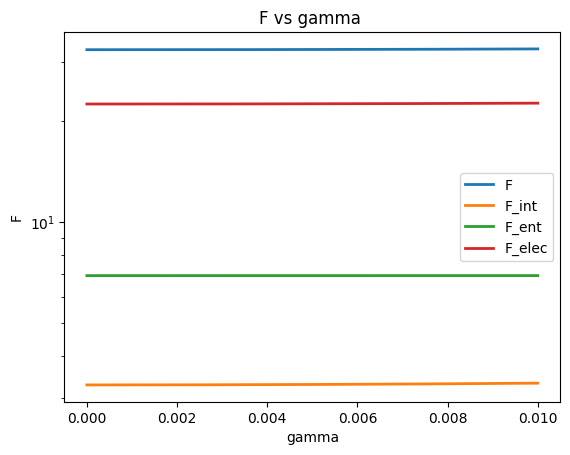

In [19]:
plt.figure()
plt.plot(gamma_vals, F_tot_vals/ (k_B * T), label="F", lw=2)
plt.plot(gamma_vals, F_int_vals/ (k_B * T), label="F_int", lw=2)
plt.plot(gamma_vals, F_ent_vals/ (k_B * T), label="F_ent", lw=2)
plt.plot(gamma_vals, F_elec_vals/ (k_B * T), label="F_elec", lw=2)
plt.xlabel('gamma')
plt.ylabel("F")
plt.title("F vs gamma ")
plt.yscale('log')
plt.legend()
plt.show()

In [20]:
F_tot_vals

array([1.34699607e-19, 1.34699625e-19, 1.34699680e-19, 1.34699771e-19,
       1.34699899e-19, 1.34700064e-19, 1.34700265e-19, 1.34700502e-19,
       1.34700776e-19, 1.34701087e-19, 1.34701434e-19, 1.34701818e-19,
       1.34702238e-19, 1.34702695e-19, 1.34703188e-19, 1.34703718e-19,
       1.34704285e-19, 1.34704888e-19, 1.34705527e-19, 1.34706203e-19,
       1.34706916e-19, 1.34707665e-19, 1.34708451e-19, 1.34709273e-19,
       1.34710132e-19, 1.34711028e-19, 1.34711960e-19, 1.34712928e-19,
       1.34713933e-19, 1.34714975e-19, 1.34716053e-19, 1.34717168e-19,
       1.34718319e-19, 1.34719507e-19, 1.34720732e-19, 1.34721993e-19,
       1.34723290e-19, 1.34724624e-19, 1.34725995e-19, 1.34727402e-19,
       1.34728846e-19, 1.34730327e-19, 1.34731844e-19, 1.34733397e-19,
       1.34734988e-19, 1.34736614e-19, 1.34738278e-19, 1.34739978e-19,
       1.34741714e-19, 1.34743487e-19, 1.34745297e-19, 1.34747143e-19,
       1.34749026e-19, 1.34750945e-19, 1.34752901e-19, 1.34754894e-19,
      

## Graph of F

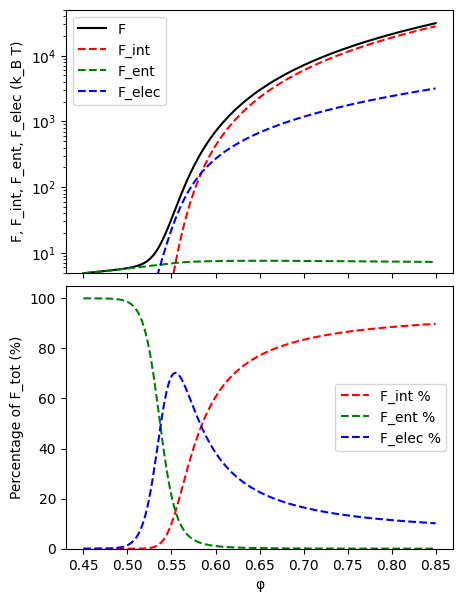

In [21]:
phi_vals = np.linspace(0.45, 0.85, 200)
F_tot_vals = []
F_int_vals = []
F_ent_vals = []
F_elec_vals = []

gamma = 0
for phi in phi_vals:
    phi_d_star, _ = find_min_phi_d(phi, gamma)
    F_tot_vals.append(F_tot(phi_d_star, phi, gamma) )
    F_int_vals.append(F_int(phi_d_star))
    F_ent_vals.append(F_ent(phi, phi_d_star, gamma))
    F_elec_vals.append(F_elec(phi_d_star, phi, gamma))

F_tot_vals = np.array(F_tot_vals)
F_int_vals = np.array(F_int_vals)
F_ent_vals = np.array(F_ent_vals)
F_elec_vals = np.array(F_elec_vals)

# Calculate percentage contributions
F_int_percentage = (F_int_vals / F_tot_vals) * 100
F_ent_percentage = (F_ent_vals / F_tot_vals) * 100
F_elec_percentage = (F_elec_vals / F_tot_vals) * 100

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 7), gridspec_kw={'height_ratios': [1, 1], 'hspace': 0.05})

# First subplot: Free energy components on log scale
ax1.plot(phi_vals, F_tot_vals/ (k_B * T), 'k-', label="F")
ax1.plot(phi_vals, F_int_vals/ (k_B * T), 'r--', label="F_int")
ax1.plot(phi_vals, F_ent_vals/ (k_B * T), 'g--', label="F_ent")
ax1.plot(phi_vals, F_elec_vals/ (k_B * T), 'b--', label="F_elec")
ax1.set_yscale('log')
ax1.set_ylim(5, 5*10e3)
ax1.set_ylabel("F, F_int, F_ent, F_elec (k_B T)")
ax1.legend(loc='upper left')

# Second subplot: Percentage contributions of each component
ax2.plot(phi_vals, F_int_percentage, 'r--', label="F_int %")
ax2.plot(phi_vals, F_ent_percentage, 'g--', label="F_ent %")
ax2.plot(phi_vals, F_elec_percentage, 'b--', label="F_elec %")
ax2.set_xlabel('φ')
ax2.set_ylabel("Percentage of F_tot (%)")
ax2.set_ylim(0, 105)
ax2.legend(loc='center right')

plt.setp(ax1.get_xticklabels(), visible=False)
plt.show()


# The plateau elastic shear modulus

## use CubicSpline

In [49]:
phi_vals = np.linspace(0.45, 0.85, num=200)
gamma_vals = np.linspace(0, 0.01, num=200)

G_p_values = []
G_p_int_values = []
G_p_ent_values = []
G_p_elec_values = []

for phi in phi_vals:
    gamma_list = []
    F_tot_star_list = []
    F_int_star_list = []
    F_ent_star_list = []
    F_elec_star_list = []
    for gamma in gamma_vals:
        phi_d_star, _ = find_min_phi_d(phi, gamma)
        F_tot_star = F_tot(phi_d_star, phi, gamma)
        F_int_star = F_int(phi_d_star)
        F_ent_star = F_ent(phi, phi_d_star, gamma)
        F_elec_star = F_elec(phi_d_star, phi, gamma)
        gamma_list.append(gamma)
        F_tot_star_list.append(F_tot_star)
        F_int_star_list.append(F_int_star)
        F_ent_star_list.append(F_ent_star)
        F_elec_star_list.append(F_elec_star)
    
    gamma_array = np.array(gamma_list)
    F_tot_star_array = np.array(F_tot_star_list)
    F_int_star_array = np.array(F_int_star_list)
    F_ent_star_array = np.array(F_ent_star_list)
    F_elec_star_array = np.array(F_elec_star_list)
    
    spline_tot = CubicSpline(gamma_array, F_tot_star_array)
    spline_int = CubicSpline(gamma_array, F_int_star_array)
    spline_ent = CubicSpline(gamma_array, F_ent_star_array)
    spline_elec = CubicSpline(gamma_array, F_elec_star_array)
    
    second_derivative = spline_tot.derivative(2)(gamma_array)
    second_derivative_int = spline_int.derivative(2)(gamma_array)
    second_derivative_ent = spline_ent.derivative(2)(gamma_array)
    second_derivative_elec = spline_elec.derivative(2)(gamma_array)
    
    G_p_prime = (phi / V_drop) * second_derivative[0]
    G_p_prime_int = (phi / V_drop) * second_derivative_int[0]
    G_p_prime_ent = (phi / V_drop) * second_derivative_ent[0]
    G_p_prime_elec = (phi / V_drop) * second_derivative_elec[0]
    
    G_p_values.append(G_p_prime)
    G_p_int_values.append(G_p_prime_int)
    G_p_ent_values.append(G_p_prime_ent)
    G_p_elec_values.append(G_p_prime_elec)

G_p_values = np.array(G_p_values)
G_p_int_values = np.array(G_p_int_values)
G_p_ent_values = np.array(G_p_ent_values)
G_p_elec_values = np.array(G_p_elec_values)

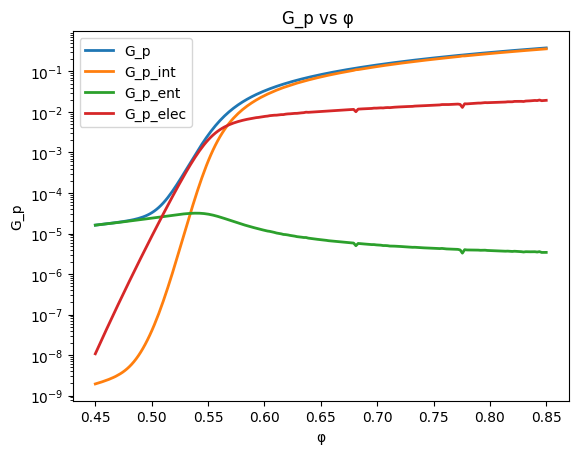

In [50]:
plt.figure()
plt.plot(phi_vals, (G_p_values * a / sigma), label="G_p", lw=2)
plt.plot(phi_vals, (G_p_int_values * a / sigma), label="G_p_int", lw=2)
plt.plot(phi_vals, (G_p_ent_values * a / sigma), label="G_p_ent", lw=2)
plt.plot(phi_vals, (G_p_elec_values * a / sigma), label="G_p_elec", lw=2)
plt.xlabel('φ')
plt.ylabel("G_p")
plt.title("G_p vs φ ")
plt.yscale('log')
plt.legend()
plt.show()

In [120]:
indices = [114, 115, 116, 161,162,163]
values = G_p_elec_values[indices]
print(values)

[419.67272718 368.3622226  426.37664009 557.99797963 469.814097
 577.72074848]


### Take G'p_elec as an example, we could see that around phi = phi_vals[115] and phi_vals[162], there are two obvious spikes. I have checked sevel points around these two phi, the match between F and its spline interpolation are pretty good.

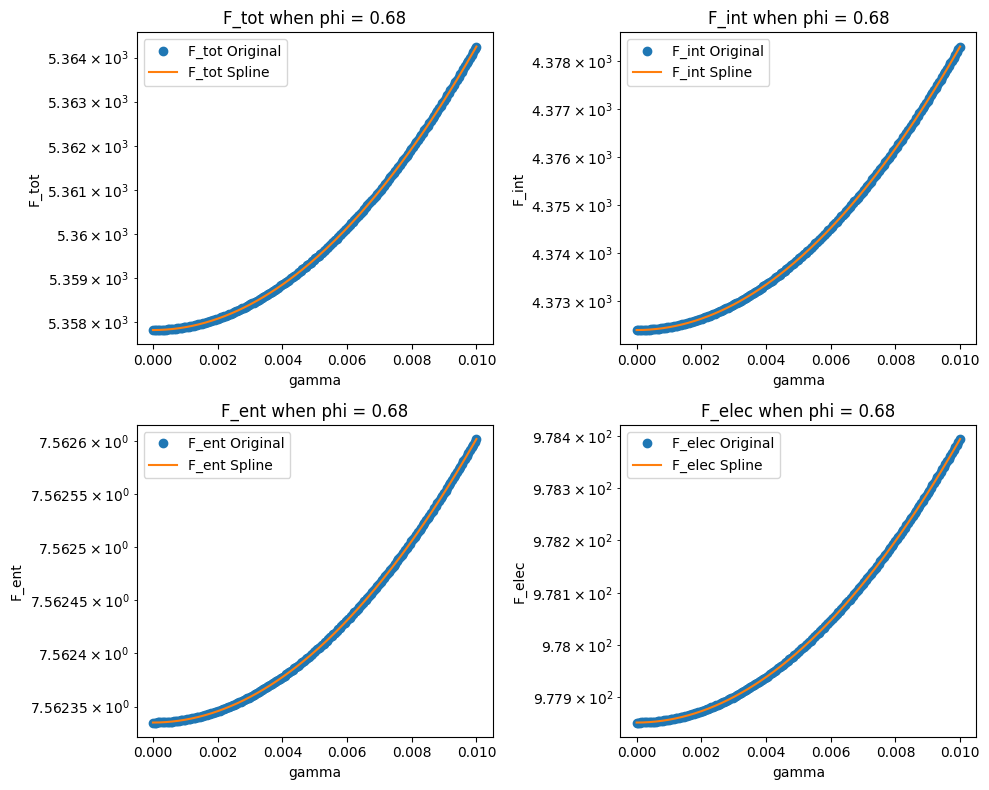

In [121]:
phi = phi_vals[115] 
gamma_list = []
F_tot_star_list = []
F_int_star_list = []
F_ent_star_list = []
F_elec_star_list = []

for gamma in gamma_vals:
    phi_d_star, _ = find_min_phi_d(phi, gamma)
    F_tot_star = F_tot(phi_d_star, phi, gamma)
    F_int_star = F_int(phi_d_star)
    F_ent_star = F_ent(phi, phi_d_star, gamma)
    F_elec_star = F_elec(phi_d_star, phi, gamma)
    gamma_list.append(gamma)
    F_tot_star_list.append(F_tot_star)
    F_int_star_list.append(F_int_star)
    F_ent_star_list.append(F_ent_star)
    F_elec_star_list.append(F_elec_star)

gamma_array = np.array(gamma_list)
F_tot_star_array = np.array(F_tot_star_list)
F_int_star_array = np.array(F_int_star_list)
F_ent_star_array = np.array(F_ent_star_list)
F_elec_star_array = np.array(F_elec_star_list)

spline_tot = CubicSpline(gamma_array, F_tot_star_array)
spline_int = CubicSpline(gamma_array, F_int_star_array)
spline_ent = CubicSpline(gamma_array, F_ent_star_array)
spline_elec = CubicSpline(gamma_array, F_elec_star_array)

F_tot_spline_values = spline_tot(gamma_array)
F_int_spline_values = spline_int(gamma_array)
F_ent_spline_values = spline_ent(gamma_array)
F_elec_spline_values = spline_elec(gamma_array)

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(gamma_array, F_tot_star_array/ (k_B * T), 'o', label='F_tot Original')
plt.plot(gamma_array, F_tot_spline_values/ (k_B * T), '-', label='F_tot Spline')
plt.xlabel('gamma')
plt.ylabel('F_tot')
plt.yscale('log')
plt.legend()
plt.title(f'F_tot when phi = {phi:.2f}')

plt.subplot(2, 2, 2)
plt.plot(gamma_array, F_int_star_array/ (k_B * T), 'o', label='F_int Original')
plt.plot(gamma_array, F_int_spline_values/ (k_B * T), '-', label='F_int Spline')
plt.xlabel('gamma')
plt.ylabel('F_int')
plt.yscale('log')
plt.legend()
plt.title(f'F_int when phi = {phi:.2f}')

plt.subplot(2, 2, 3)
plt.plot(gamma_array, F_ent_star_array/ (k_B * T), 'o', label='F_ent Original')
plt.plot(gamma_array, F_ent_spline_values/ (k_B * T), '-', label='F_ent Spline')
plt.xlabel('gamma')
plt.ylabel('F_ent')
plt.yscale('log')
plt.legend()
plt.title(f'F_ent when phi = {phi:.2f}')

plt.subplot(2, 2, 4)
plt.plot(gamma_array, F_elec_star_array/ (k_B * T), 'o', label='F_elec Original')
plt.plot(gamma_array, F_elec_spline_values/ (k_B * T), '-', label='F_elec Spline')
plt.xlabel('gamma')
plt.ylabel('F_elec')
plt.yscale('log')
plt.legend()
plt.title(f'F_elec when phi = {phi:.2f}')

plt.tight_layout()
plt.show()

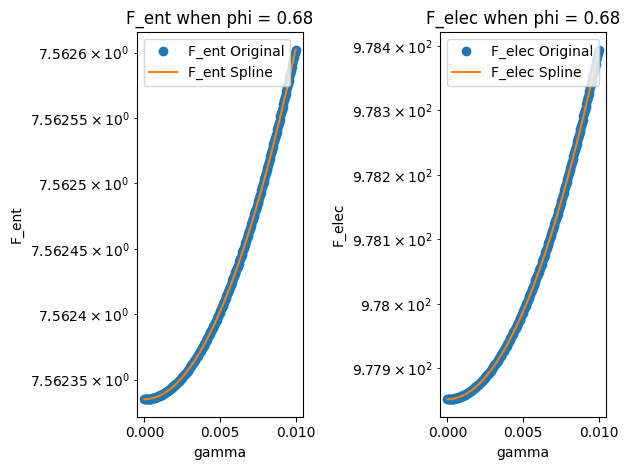

In [123]:
plt.subplot(1, 2, 1)
plt.plot(gamma_array, F_ent_star_array/ (k_B * T), 'o', label='F_ent Original')
plt.plot(gamma_array, F_ent_spline_values/ (k_B * T), '-', label='F_ent Spline')
plt.xlabel('gamma')
plt.ylabel('F_ent')
plt.yscale('log')
plt.legend()
plt.title(f'F_ent when phi = {phi:.2f}')

plt.subplot(1, 2, 2)
plt.plot(gamma_array, F_elec_star_array/ (k_B * T), 'o', label='F_elec Original')
plt.plot(gamma_array, F_elec_spline_values/ (k_B * T), '-', label='F_elec Spline')
plt.xlabel('gamma')
plt.ylabel('F_elec')
plt.yscale('log')
plt.legend()
plt.title(f'F_elec when phi = {phi:.2f}')

plt.tight_layout()
plt.show()

## Least Square Fit

In [ ]:
phi_vals = np.linspace(0.45, 0.85, num=200)
gamma_vals = np.linspace(0, 0.01, num=200)

G_p_values = []
G_p_int_values = []
G_p_ent_values = []
G_p_elec_values = []

for phi in phi_vals:
    gamma_list = []
    F_tot_star_list = []
    F_int_star_list = []
    F_ent_star_list = []
    F_elec_star_list = []
    for gamma in gamma_vals:
        phi_d_star, _ = find_min_phi_d(phi, gamma)
        F_tot_star = F_tot(phi_d_star, phi, gamma)
        F_int_star = F_int(phi_d_star)
        F_ent_star = F_ent(phi, phi_d_star, gamma)
        F_elec_star = F_elec(phi_d_star, phi, gamma)
        gamma_list.append(gamma)
        F_tot_star_list.append(F_tot_star)
        F_int_star_list.append(F_int_star)
        F_ent_star_list.append(F_ent_star)
        F_elec_star_list.append(F_elec_star)
    gamma_array = np.array(gamma_list)
    F_tot_star_array = np.array(F_tot_star_list)
    F_int_star_array = np.array(F_int_star_list)
    F_ent_star_array = np.array(F_ent_star_list)
    F_elec_star_array = np.array(F_elec_star_list)
    # Masks to filter out invalid values
    mask_tot = np.isfinite(F_tot_star_array)
    mask_int = np.isfinite(F_int_star_array)
    mask_ent = np.isfinite(F_ent_star_array)
    mask_elec = np.isfinite(F_elec_star_array)
    # Model function for curve fitting
    def model(gamma, p0, p1, p2):
        return p0 + p1 * gamma + p2 * gamma**2
    initial_guess = [min(F_tot_star_array[mask_tot]), 0.0, 0.0]

    params, _ = curve_fit(model, gamma_array[mask_tot], F_tot_star_array[mask_tot], p0=initial_guess)
    params_int, _ = curve_fit(model, gamma_array[mask_int], F_int_star_array[mask_int], p0=initial_guess)
    params_ent, _ = curve_fit(model, gamma_array[mask_ent], F_ent_star_array[mask_ent], p0=initial_guess)
    params_elec, _ = curve_fit(model, gamma_array[mask_elec], F_elec_star_array[mask_elec], p0=initial_guess)
    a0, a1, a2 = params
    int_a0, int_a1, int_a2 = params_int
    ent_a0, ent_a1, ent_a2 = params_ent
    elec_a0, elec_a1, elec_a2 = params_elec
    second_derivative = 2 * a2
    second_derivative_int = 2 * int_a2
    second_derivative_ent = 2 * ent_a2
    second_derivative_elec = 2 * elec_a2
    G_p_prime = (phi / V_drop) * second_derivative
    G_p_prime_int = (phi / V_drop) * second_derivative_int
    G_p_prime_ent = (phi / V_drop) * second_derivative_ent
    G_p_prime_elec = (phi / V_drop) * second_derivative_elec
    G_p_values.append(G_p_prime)
    G_p_int_values.append(G_p_prime_int)
    G_p_ent_values.append(G_p_prime_ent)
    G_p_elec_values.append(G_p_prime_elec)


G_p_values = np.array(G_p_values)
G_p_int_values = np.array(G_p_int_values)
G_p_ent_values = np.array(G_p_ent_values)
G_p_elec_values = np.array(G_p_elec_values)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


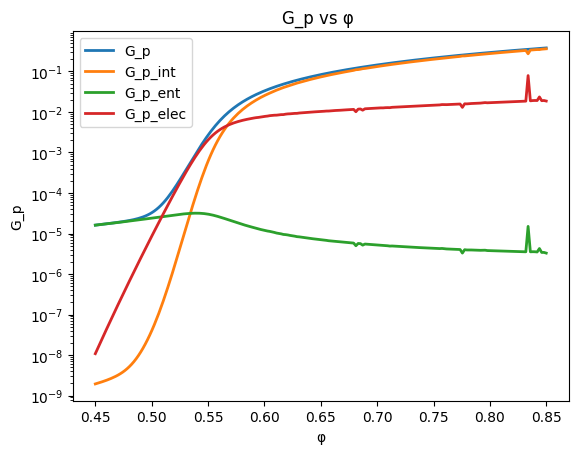

In [ ]:
plt.figure()
plt.plot(phi_vals, (G_p_values * a / sigma), label="G_p", lw=2)
plt.plot(phi_vals, (G_p_int_values * a / sigma), label="G_p_int", lw=2)
plt.plot(phi_vals, (G_p_ent_values * a / sigma), label="G_p_ent", lw=2)
plt.plot(phi_vals, (G_p_elec_values * a / sigma), label="G_p_elec", lw=2)
plt.xlabel('φ')
plt.ylabel("G_p")
plt.title("G_p vs φ ")
plt.yscale('log')
plt.legend()
plt.show()


## Use Gaussian Filter to smooth the curve


also tried Savitzky-Golay filter, but Gaussian Filter works better in here

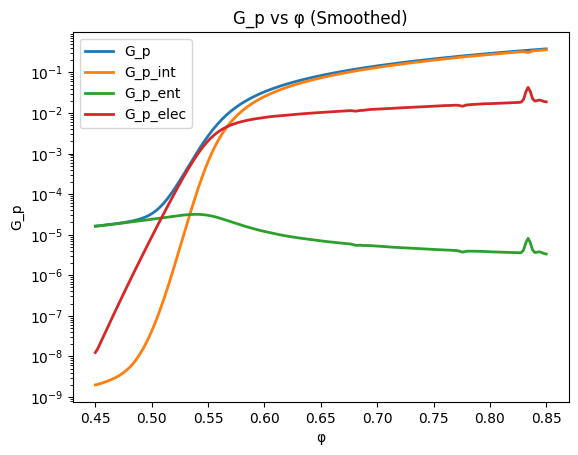

In [ ]:
G_p_values_smooth = gaussian_filter1d(G_p_values, sigma=1)
G_p_int_values_smooth = gaussian_filter1d(G_p_int_values, sigma=1)
G_p_ent_values_smooth = gaussian_filter1d(G_p_ent_values, sigma=1)
G_p_elec_values_smooth = gaussian_filter1d(G_p_elec_values, sigma=1)

# Plotting the smoothed results
plt.figure()
plt.plot(phi_vals, (G_p_values_smooth * a / sigma), label="G_p", lw=2)
plt.plot(phi_vals, (G_p_int_values_smooth * a / sigma), label="G_p_int", lw=2)
plt.plot(phi_vals, (G_p_ent_values_smooth * a / sigma), label="G_p_ent", lw=2)
plt.plot(phi_vals, (G_p_elec_values_smooth * a / sigma), label="G_p_elec", lw=2)
plt.xlabel('φ')
plt.ylabel("G_p")
plt.title("G_p vs φ (Smoothed)")
plt.yscale('log')
plt.legend()
plt.show()

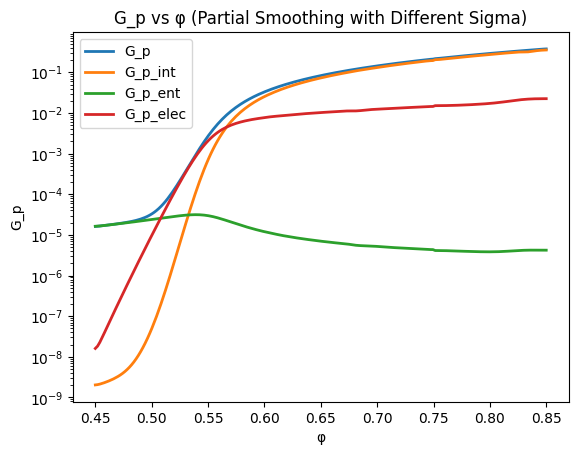

In [ ]:
split_index = np.searchsorted(phi_vals, 0.75)

G_p_values_smooth_1 = gaussian_filter1d(G_p_values[:split_index], sigma=1)
G_p_int_values_smooth_1 = gaussian_filter1d(G_p_int_values[:split_index], sigma=2)
G_p_ent_values_smooth_1 = gaussian_filter1d(G_p_ent_values[:split_index], sigma=2)
G_p_elec_values_smooth_1 = gaussian_filter1d(G_p_elec_values[:split_index], sigma=2)

G_p_values_smooth_2 = gaussian_filter1d(G_p_values[split_index:], sigma=1)
G_p_int_values_smooth_2 = gaussian_filter1d(G_p_int_values[split_index:], sigma=2)
G_p_ent_values_smooth_2 = gaussian_filter1d(G_p_ent_values[split_index:], sigma=8)
G_p_elec_values_smooth_2 = gaussian_filter1d(G_p_elec_values[split_index:], sigma=8)

G_p_values_combined = np.concatenate([G_p_values_smooth_1, G_p_values_smooth_2])
G_p_int_values_combined = np.concatenate([G_p_int_values_smooth_1, G_p_int_values_smooth_2])
G_p_ent_values_combined = np.concatenate([G_p_ent_values_smooth_1, G_p_ent_values_smooth_2])
G_p_elec_values_combined = np.concatenate([G_p_elec_values_smooth_1, G_p_elec_values_smooth_2])

plt.figure()
plt.plot(phi_vals, (G_p_values_combined * a / sigma), label="G_p", lw=2)
plt.plot(phi_vals, (G_p_int_values_combined * a / sigma), label="G_p_int", lw=2)
plt.plot(phi_vals, (G_p_ent_values_combined * a / sigma), label="G_p_ent", lw=2)
plt.plot(phi_vals, (G_p_elec_values_combined * a / sigma), label="G_p_elec", lw=2)
plt.xlabel('φ')
plt.ylabel("G_p")
plt.title("G_p vs φ (Partial Smoothing with Different Sigma)")
plt.yscale('log')
plt.legend()
plt.show()

## Percent relative contributions

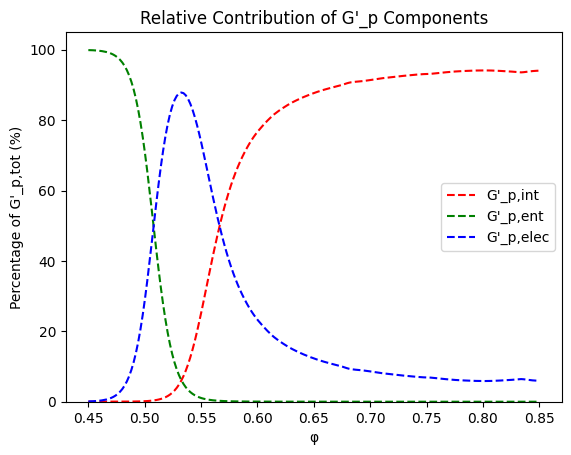

In [ ]:
G_p_tot = G_p_int_values_combined + G_p_ent_values_combined + G_p_elec_values_combined

G_p_int_percentage = (G_p_int_values_combined / G_p_tot) * 100
G_p_ent_percentage = (G_p_ent_values_combined / G_p_tot) * 100
G_p_elec_percentage = (G_p_elec_values_combined / G_p_tot) * 100

plt.figure()
plt.plot(phi_vals, G_p_int_percentage, 'r--', label="G'_p,int")   
plt.plot(phi_vals, G_p_ent_percentage, 'g--', label="G'_p,ent")  
plt.plot(phi_vals, G_p_elec_percentage, 'b--', label="G'_p,elec") 
plt.xlabel('φ')
plt.ylabel("Percentage of G'_p,tot (%)")
plt.ylim(0, 105)  
plt.legend()
plt.title("Relative Contribution of G'_p Components")
plt.show()


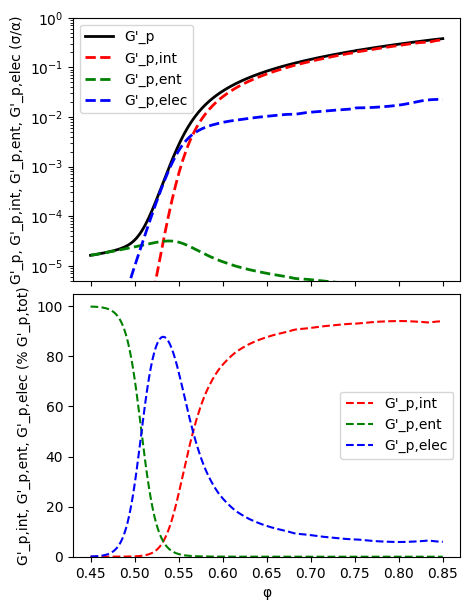

In [ ]:
fig = plt.figure(figsize=(5, 7))
gs = GridSpec(2, 1, height_ratios=[1, 1], hspace=0.05)


ax1 = fig.add_subplot(gs[0])
ax1.plot(phi_vals, (G_p_values_combined * a / sigma), 'k-', label="G'_p", lw=2)
ax1.plot(phi_vals, (G_p_int_values_combined * a / sigma), 'r--', label="G'_p,int", lw=2)
ax1.plot(phi_vals, (G_p_ent_values_combined * a / sigma), 'g--', label="G'_p,ent", lw=2)
ax1.plot(phi_vals, (G_p_elec_values_combined * a / sigma), 'b--', label="G'_p,elec", lw=2)
ax1.set_yscale('log')
ax1.set_ylim(5*10e-7, 1)
ax1.set_ylabel("G'_p, G'_p,int, G'_p,ent, G'_p,elec (σ/α)")
ax1.legend(loc='upper left')

ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax2.plot(phi_vals, G_p_int_percentage, 'r--', label="G'_p,int")
ax2.plot(phi_vals, G_p_ent_percentage, 'g--', label="G'_p,ent")
ax2.plot(phi_vals, G_p_elec_percentage, 'b--', label="G'_p,elec")
ax2.set_xlabel('φ')
ax2.set_ylabel("G'_p,int, G'_p,ent, G'_p,elec (% G'_p,tot)")
ax2.set_ylim(0, 105)
ax2.legend(loc='center right')

plt.setp(ax1.get_xticklabels(), visible=False)

plt.show()

# Osmotic Pressure

using the gradient

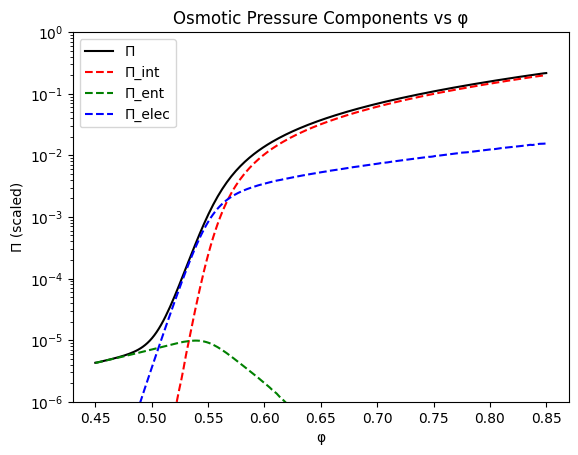

In [ ]:
gamma = 0

F_tot_star_values = []
F_int_star_values = []
F_ent_star_values = []
F_elec_star_values = []
for phi in phi_vals:
    phi_d_star, F_tot_star = find_min_phi_d(phi, gamma)
    F_tot_star_values.append(F_tot_star)
    F_int_star_values.append(F_int(phi_d_star))
    F_ent_star_values.append(F_ent(phi, phi_d_star, gamma))
    F_elec_star_values.append(F_elec(phi_d_star, phi, gamma))

F_tot_star_values = np.array(F_tot_star_values)
F_int_star_values = np.array(F_int_star_values)
F_ent_star_values = np.array(F_ent_star_values)
F_elec_star_values = np.array(F_elec_star_values)

# Calculate the osmotic pressures using the gradient
dF_tot_dphi = np.gradient(F_tot_star_values, phi_vals)  
dF_int_dphi = np.gradient(F_int_star_values, phi_vals)  
dF_ent_dphi = np.gradient(F_ent_star_values, phi_vals)  
dF_elec_dphi = np.gradient(F_elec_star_values, phi_vals)  

osmotic_pressure_tot = phi_vals**2 / V_drop * dF_tot_dphi
osmotic_pressure_int = phi_vals**2 / V_drop * dF_int_dphi
osmotic_pressure_ent = phi_vals**2 / V_drop * dF_ent_dphi
osmotic_pressure_elec = phi_vals**2 / V_drop * dF_elec_dphi

plt.figure()
plt.plot(phi_vals, osmotic_pressure_tot * a / sigma, 'k-', label="Π")           
plt.plot(phi_vals, osmotic_pressure_int * a / sigma, 'r--', label="Π_int")      
plt.plot(phi_vals, osmotic_pressure_ent * a / sigma, 'g--', label="Π_ent")      
plt.plot(phi_vals, osmotic_pressure_elec * a / sigma, 'b--', label="Π_elec")    

plt.xlabel('φ')
plt.ylabel('Π (scaled)')
plt.yscale('log')
plt.ylim(10e-7, 1)
plt.title('Osmotic Pressure Components vs φ')
plt.legend()
plt.show()

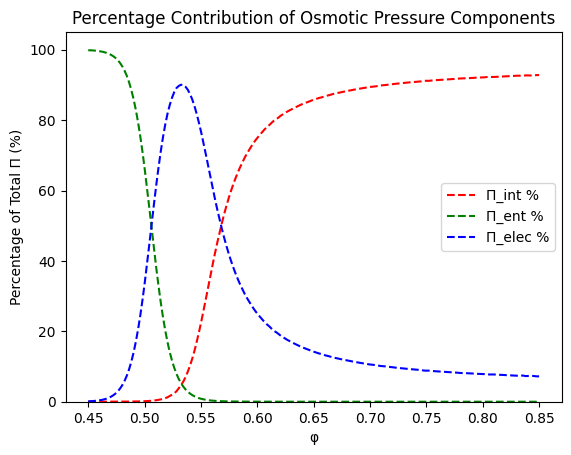

In [ ]:
osmotic_pressure_int_percentage = (osmotic_pressure_int / osmotic_pressure_tot) * 100
osmotic_pressure_ent_percentage = (osmotic_pressure_ent / osmotic_pressure_tot) * 100
osmotic_pressure_elec_percentage = (osmotic_pressure_elec / osmotic_pressure_tot) * 100

plt.figure()
plt.plot(phi_vals, osmotic_pressure_int_percentage, 'r--', label="Π_int %")     
plt.plot(phi_vals, osmotic_pressure_ent_percentage, 'g--', label="Π_ent %")    
plt.plot(phi_vals, osmotic_pressure_elec_percentage, 'b--', label="Π_elec %")   
plt.xlabel('φ')
plt.ylabel('Percentage of Total Π (%)')
plt.ylim(0, 105)  
plt.title('Percentage Contribution of Osmotic Pressure Components')
plt.legend()
plt.show()

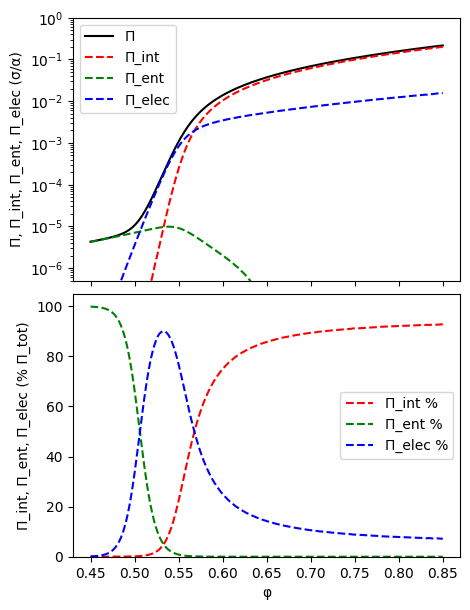

In [ ]:
fig = plt.figure(figsize=(5, 7))
gs = GridSpec(2, 1, height_ratios=[1, 1], hspace=0.05)

ax1 = fig.add_subplot(gs[0])
ax1.plot(phi_vals, osmotic_pressure_tot * a / sigma, 'k-', label="Π")
ax1.plot(phi_vals, osmotic_pressure_int * a / sigma, 'r--', label="Π_int")
ax1.plot(phi_vals, osmotic_pressure_ent * a / sigma, 'g--', label="Π_ent")
ax1.plot(phi_vals, osmotic_pressure_elec * a / sigma, 'b--', label="Π_elec")
ax1.set_yscale('log')
ax1.set_ylabel("Π, Π_int, Π_ent, Π_elec (σ/α)")
ax1.set_ylim(5*1e-7, 1)
ax1.legend(loc='upper left')


ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax2.plot(phi_vals, osmotic_pressure_int_percentage, 'r--', label="Π_int %")
ax2.plot(phi_vals, osmotic_pressure_ent_percentage, 'g--', label="Π_ent %")
ax2.plot(phi_vals, osmotic_pressure_elec_percentage, 'b--', label="Π_elec %")
ax2.set_xlabel('φ')
ax2.set_ylabel("Π_int, Π_ent, Π_elec (% Π_tot)")
ax2.set_ylim(0, 105)
ax2.legend(loc='center right')

plt.setp(ax1.get_xticklabels(), visible=False)


plt.show()

# End
